**NOTE:** You probably will see warnings. These are not errors! However, you should read them and try to understand why they're there. Can you fix them?

![](http://rentinginla.com/wp-content/uploads/2015/12/Buying.jpg)
# [Project 2: Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this project is for you to use EDA, visualization, data cleaning, preprocesing, and linear models to predict home prices given the features of the home, and interpret your linear models to find out what features add value to a home! This project is a bit more open-ended than project 1. 

Be sure to ...

* Think about your choices when it comes to your choices about the data. Be ready to defend your decisions!
* Use lots of plots to dig deeper into the data! Describe the plots and convey what you learned from them.
* Don't forget to read the [description of the data](../data_description.txt) (also available at the kaggle website)! This has valuable information that will help you clean and impute data. `NaN` means something in many of the columns! Don't just drop or fill them!
* Try fitting many models! Document your work and note what you've tried.
* Apply what you've learned in class, books, videos, Kaggle forums, and blog posts. There have been a TON of blog posts about this;  you should seek them out and read them!


From the Kaggle competition website:

    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.display import display

%matplotlib inline 
np.random.seed(42)

## 1. Load the Data 

* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
house_data = pd.read_csv('../data/train.csv')
house_data.set_index('Id', inplace=True)  # set index as 'Id'
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [4]:
house_data['MSSubClass'] = house_data['MSSubClass'].apply(lambda x: str(x)) # making MSSubClass strings to that it will be a categorical column

In [5]:
numeric_columns_house_df = house_data.select_dtypes(include=[np.number])

In [6]:
nonnumeric_columns_house_df = house_data.select_dtypes(exclude=[np.number])
nonnumeric_columns_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 44 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423

In [7]:
numeric_columns_house_df.sample(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
893,70.0,8414,6,8,1963,2003,0.0,663,0,396,1059,1068,0,0,1068,0,1,1,0,3,1,6,0,1963.0,1,264,192,0,0,0,0,0,0,2,2006,154500
1106,98.0,12256,8,5,1994,1995,362.0,1032,0,431,1463,1500,1122,0,2622,1,0,2,1,3,1,9,2,1994.0,2,712,186,32,0,0,0,0,0,4,2010,325000
414,56.0,8960,5,6,1927,1950,0.0,0,0,1008,1008,1028,0,0,1028,0,0,1,0,2,1,5,1,1927.0,2,360,0,0,130,0,0,0,0,3,2010,115000
523,50.0,5000,6,7,1947,1950,0.0,399,0,605,1004,1004,660,0,1664,0,0,2,0,3,1,7,2,1950.0,2,420,0,24,36,0,0,0,0,10,2006,159000
1037,89.0,12898,9,5,2007,2008,70.0,1022,0,598,1620,1620,0,0,1620,1,0,2,0,2,1,6,1,2008.0,3,912,228,0,0,0,0,0,0,9,2009,315500


In [8]:
nonnumeric_columns_house_df.sample(5)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1140,30,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,Gable,CompShg,Stucco,Stucco,None,TA,Fa,BrkTil,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,TA,Maj1,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1310,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,GdWo,NaN,WD,Normal
677,70,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,AsbShng,Stucco,None,TA,TA,BrkTil,TA,Fa,No,Unf,Unf,GasW,Fa,N,SBrkr,TA,Min2,NaN,2Types,Unf,Fa,Fa,N,NaN,NaN,NaN,WD,Normal
615,180,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,SFoyer,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,Gd,TA,Av,LwQ,GLQ,GasA,Ex,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1256,50,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,BrkTil,TA,Fa,No,LwQ,Unf,GasA,TA,Y,FuseA,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


**Bonus:** Write an assertion statement to programmatically verify the correct number of rows and columns were imported.

## 2. Exploratory Data Analysis (EDA)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

***A: The column is MSSubClass that is categorical. Each of the numbers have nothing to do with what they represent.***


### B. Plot histograms of the numeric columns. 

In [9]:
# creating list of ints for the subplot creation below
col = [0,1,2]*12
row = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10,11,11,11]

len(col) == len(row)

True

In [10]:
numeric_columns_array = np.array(numeric_columns_house_df.columns)
nonnumeric_columns_list = list(nonnumeric_columns_house_df.columns)

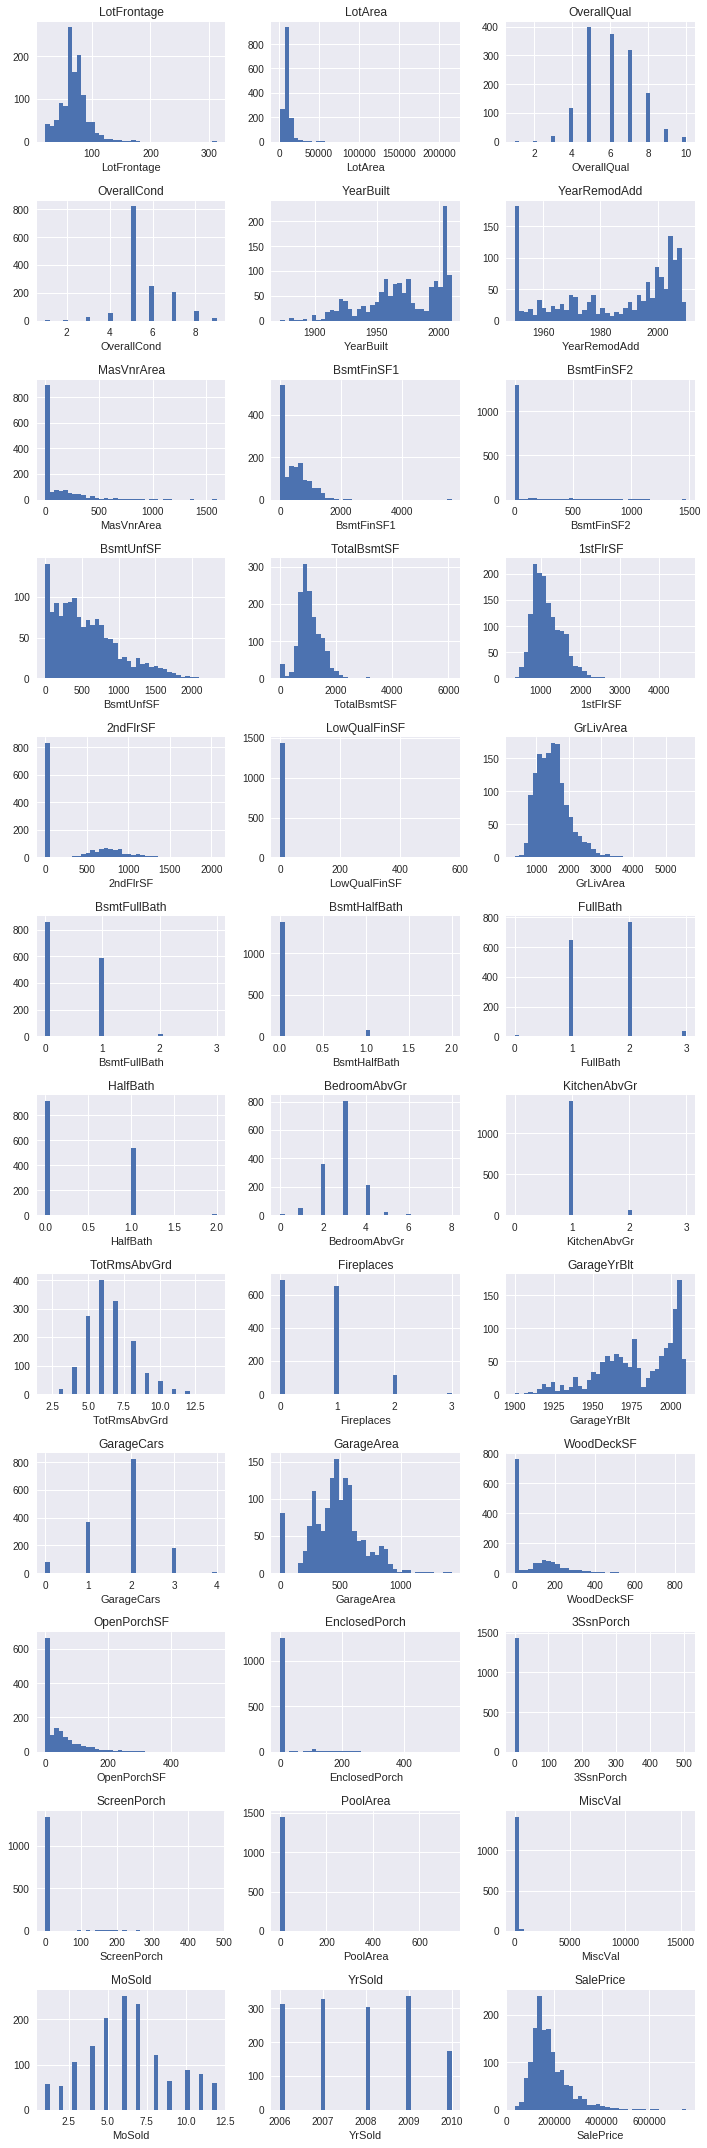

In [11]:
figure, ax = plt.subplots(nrows=12, ncols=3, figsize=(10,30))
sns.set()
x = 0
for column in numeric_columns_array:
    r,c = row[x],col[x]
    ax[r,c].hist(numeric_columns_house_df[column].dropna(), bins=38)
    ax[r,c].set_title(column)
    ax[r,c].set_xlabel(column)
    x = x + 1
figure.tight_layout()

#### What are your observations? Add them to this markdown cell.

---

* most houses have an overall quality of 5
* most houses sold in the summer
* houses started having garages built in the 1980's
* there was a decline in house contruction in the 70s, and started to spike after 2000

### C. Plot the Numeric Columns Against `SalePrice` using scatter plots.

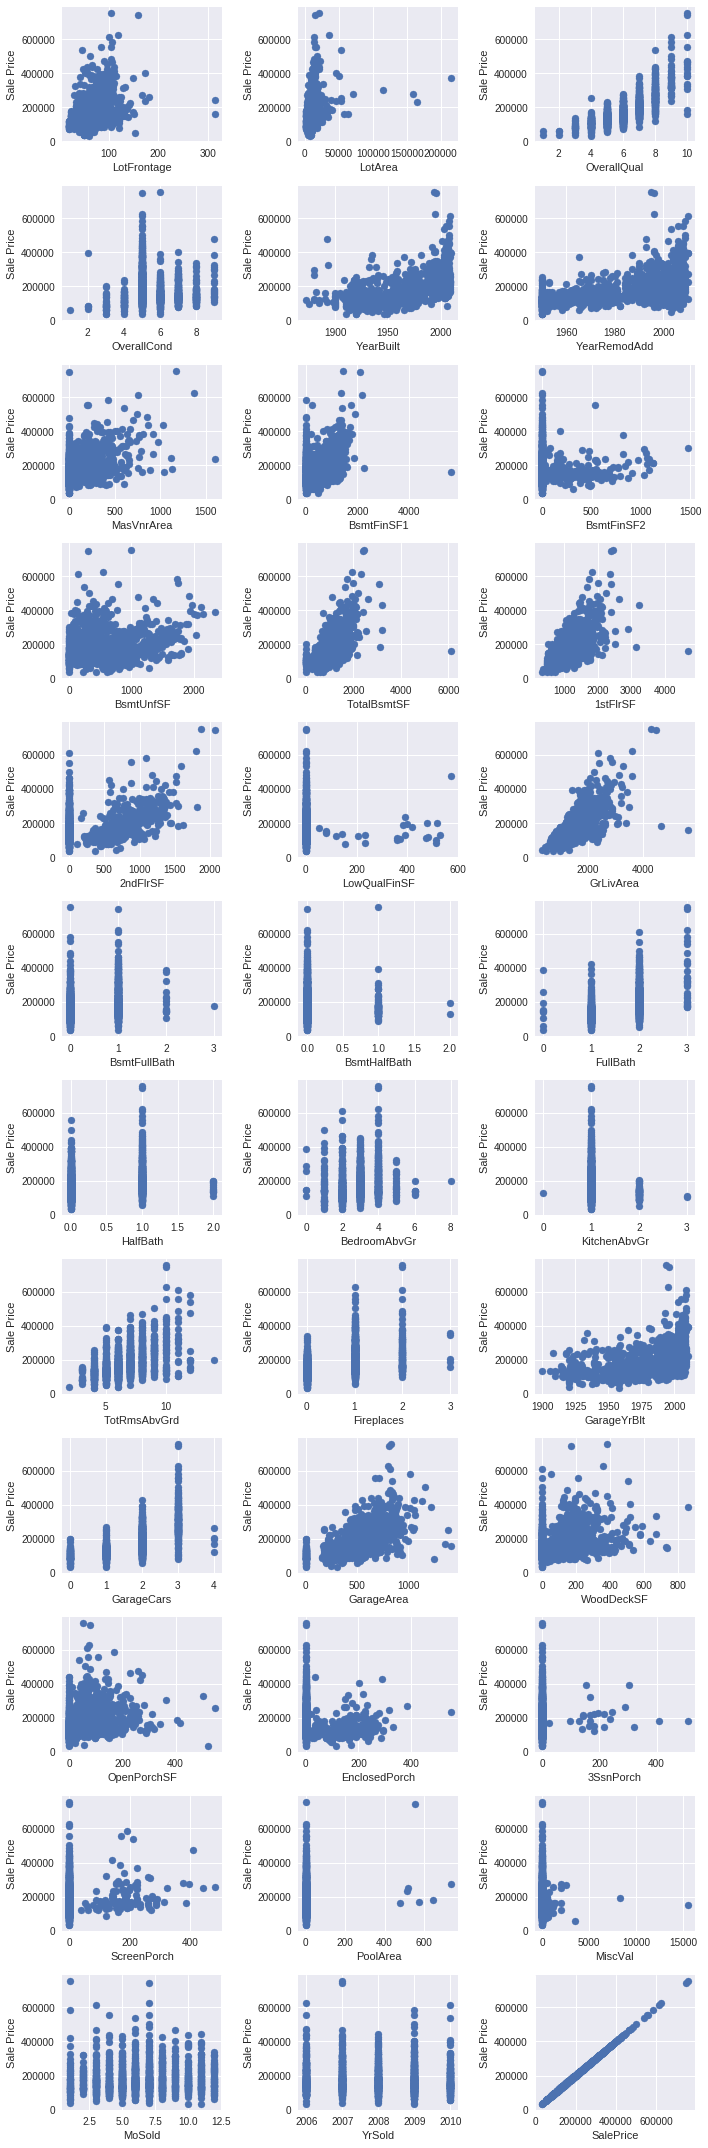

In [12]:
figure, ax = plt.subplots(nrows=12, ncols=3, figsize=(10,30))

ct = 0
for column in numeric_columns_array:
    r,c = row[ct],col[ct]
    xx = numeric_columns_house_df[column]
    yy = numeric_columns_house_df['SalePrice']
    ax[r,c].scatter(x=xx, y=yy)
    ax[r,c].set_xlabel(column)
    ax[r,c].set_ylabel('Sale Price')
    ct = ct + 1
figure.tight_layout()

#### What are your observations? Add them to this markdown cell.

---

* there is a positive correlation between sale price and:
    * lot size
    * overall quality
    * year built
    * MasVnrArea
    * Square footage columns ( Total Basement, 1st floor, GrLivArea, etc)
    * full bath
    * garage area

### D. Use bar plots to plot categorical features against `SalePrice`. 

**HINT:** Look up how to create bar plots in `matplotlib`. You will have to transform the data before you can create a bar plot! Also, look up [how to plot error bars](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars) so you can also observe the variability in your data!

In [13]:
# For coloring graphs below
rainbow = [
    '#f80c12',
    '#ee1100',
    '#ff3311',
    '#ff4422',
    '#ff6644',
    '#ff9933',
    '#feae2d',
    '#ccbb33',
    '#d0c310',
    '#aacc22',
    '#69d025',
    '#22ccaa',
    '#12bdb9',
    '#11aabb',
    '#4444dd',
    '#3311bb',
    '#3b0cbd',
    '#442299',  
]*4

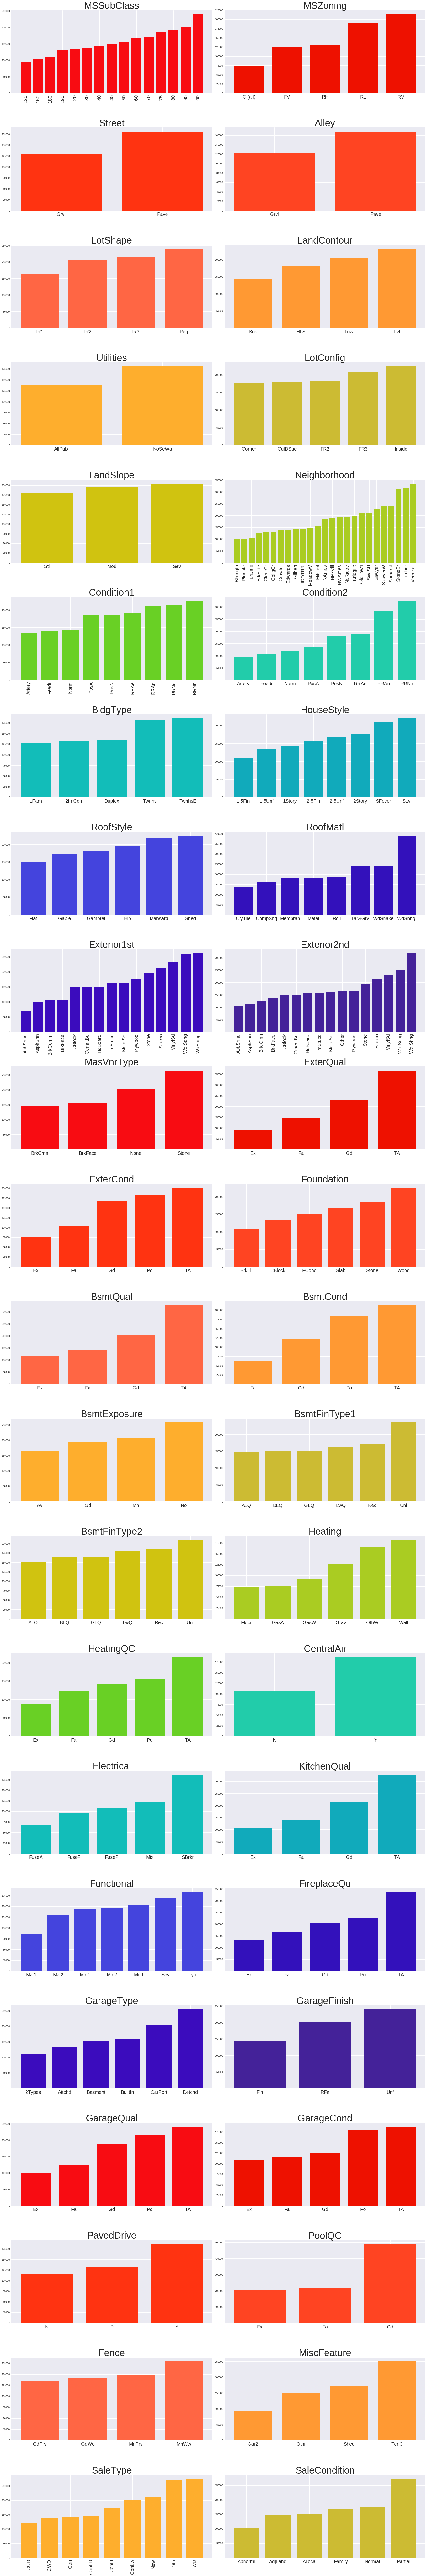

In [14]:
# Instantiating the figure and i, a variable I will use to add sub plots
fig = plt.figure(figsize = (25,150))
i = 1
c = 0

# Iterate through the column names in the nonnumeric_columns_house_df
for col_name in nonnumeric_columns_list:  

    col_group = house_data.groupby(col_name) # Creating pandas groupby object to iterate through
    fig.add_subplot(22,2,i) # Subplot to figure
    group_mean_list = [] # Instantiating list to fill with SalePrice means
    
    # creating the data for each graph.
    for group in col_group.groups:
        
        
        categories_from_group = []
        
        mask = house_data[col_name] == group
        mask_mean = house_data[mask]['SalePrice'].mean()
        
        group_mean_list.append(mask_mean)
    
    # creating graphs.
    N = range(0, len(col_group.groups.keys()))
    x_tix = list(col_group.groups.keys())
    group_mean_list.sort()  
    
    plt.bar(N, group_mean_list, color=rainbow[c])
    plt.title(col_name, fontsize=40)
    plt.tight_layout(pad=1, w_pad=1, h_pad=1)
    
    # since the number of bars is different for each graph, I'm changing the labels to vertical for graphs with lots of categories.
    if len(col_group.groups.keys()) > 8:
        plt.xticks(N, x_tix, rotation='vertical', fontsize=20)
    else:
        plt.xticks(N, x_tix, fontsize=20)
    i += 1
    c += 1


#### What are your observations? Add them to this markdown cell.

---

NOTE to self: Sice these graphs do not include counts, the categories could be misinterpreted. for example, there is a large difference in sales price depending on Neighborhood, but maybe there is a lot of houses being sold in the mid range neighborhoods, and only one house was sold in 'Veenker' which is making it look like the most expensive neighborhood.

* seeing big difference in sale price between neighborhood, mssubclass, condition 2, RoofMatl, Exterior1st and 2nd, exter qual, MasVnrTrype, foundation, basment quality, heating, central air, electrical, kitch qual, and sale condition. 

## 3. Preprocessing

### A. Identify and Remove Outliers for `SalePrice`

Make sure to... 
* Plot a histogram of the housing price. 
* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?
* Use masking to remove the outliers as you've defined them.

In [15]:
def find_iqr(dataset):
    '''
    Takes pandas series as a parameter and calculates
    the interquartile range.
    '''
    q75, q25 = np.percentile(dataset, [75 ,25])
    return q75 - q25

def tukey_fences(dataset):
    '''
    Takes pandas series as a parameter and calculates the 
    interquartile range and the Lower/Upper Tukey fences.
    '''
    Q1 = np.percentile(dataset, 25)
    Q3 = np.percentile(dataset, 75)
    outlier = 1.5
    IQR = find_iqr(dataset)
    lf = Q1 - 1.5*IQR
    uf = Q3 + 1.5*IQR
    print("Lower Fence:", lf, "\nUpper Fence:", uf, "\nIQR:", IQR)

In [16]:
find_iqr(house_data.SalePrice)

84025.0

In [17]:
tukey_fences(house_data.SalePrice)

Lower Fence: 3937.5 
Upper Fence: 340037.5 
IQR: 84025.0


In [18]:
# Using std to see if that is better for defining outliers

std_saleprice = np.std(house_data.SalePrice)
median_saleprice = np.median(house_data.SalePrice) #using median due to skew of SalePrice distribution
lower_bound = median_saleprice - 1.25*std_saleprice
upper_bound = median_saleprice + 2*std_saleprice
print(lower_bound, upper_bound)

63730.8851424 321830.583772


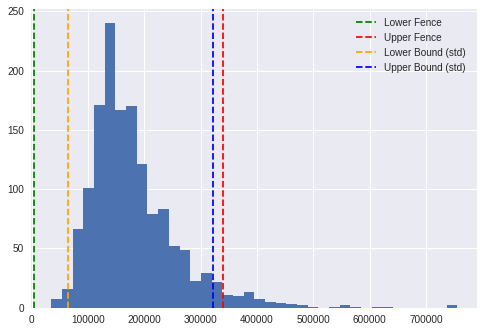

In [19]:
saleprice_bins = int(np.sqrt(len(house_data)))

plt.hist(house_data.SalePrice, bins=saleprice_bins)
plt.axvline(x=3937.5, c='green', linestyle='dashed', label='Lower Fence')
plt.axvline(x=340037.5, c='r', linestyle='dashed', label='Upper Fence')
plt.axvline(x=lower_bound, c='orange', linestyle='dashed', label='Lower Bound (std)')
plt.axvline(x=upper_bound, c='b', linestyle='dashed', label='Upper Bound (std) ')
plt.legend()

In [20]:
mask1 = house_data['SalePrice'] >= 3937.5
mask2 = house_data['SalePrice'] <= 340037.5

m1 = house_data[mask1]
m2 = m1[mask2]

house_data = m2
house_data['SalePrice'].max()

340000

### B. Fill missing data!

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
* For each column with nulls, do nulls represent anything? Read the data description.
  * Some columns that are appearing as _null_ might legitimately be known (ie: "na").  Double check the [data description](../data_description.txt) for proper value representation.  A feature might actually be better represented by "not available" or "na" rather than `NULL` or `NaN`.  There's a difference between `NULL` (unknown), and "NA" (not available).  It might mean the difference between "there isn't a garage" and "there is no garage data". 
* Fill null values for each column by imputation. Here are some common methods for imputation:
  1. Using domain knowledge to select an appropriate value.
  1. Value from a randomly selected row.
  2. Mean, median, or mode value of the series.
  3. Value estimated by a predictive model.
* Make sure to justify your method for filling null values.
  

In [21]:
nul_ct = []
for hd_col in house_data.columns:
    a_mask = house_data[hd_col].isnull()
    if len(house_data[a_mask]) > 0:
        nul_ct.append(len(house_data[a_mask]))  

In [22]:
# finding columns with nulls
nul_col = []
for hd_col in house_data.columns:
    a_mask = house_data[hd_col].isnull()
    if len(house_data[a_mask]) > 0:
        print(hd_col,":",len(house_data[a_mask]))
        nul_col.append(hd_col)       

LotFrontage : 256
Alley : 1308
MasVnrType : 7
MasVnrArea : 7
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 689
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1393
Fence : 1122
MiscFeature : 1345


In [48]:
nul_bar = pd.DataFrame(list(zip(nul_col, nul_ct)), columns=['col_name', 'null_count']).sort_values('null_count')

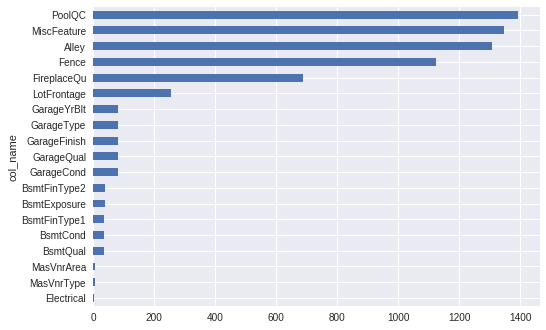

In [101]:
nul_bar.plot.barh(x='col_name', y='null_count', legend=False)

In [50]:
# made this list based on the data description. In each of these cols, none/null/nan means something.
ignore_null = ['Alley', 
               'BsmtQual', 
               'BsmtCond', 
               'BsmtExposure', 
               'BsmtFinType1',
               'BsmtFinType2',
               'FireplaceQu',
               'GarageType',
               'GarageFinish',
               'GarageQual',
               'GarageCond',
               'PoolQC',
               'Fence',
               'MiscFeature',
               'MasVnrType',
              ]
len(ignore_null), len(nul_col) # seeing if I need to fix cols, and I do.

(15, 19)

In [51]:
# finding diffs between the columns that have nulls and my ignore_nulls list.

fix_null_list = [x for x in nul_col if x not in ignore_null] 
fix_null_list

['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt']

In [52]:
# Used this cell to find the proper replacement for the one null in house_data.
# All of the 'Electrical' observations for houses built in 2006 have 'SBrkr'
E_mask = house_data['YearBuilt'] == 2006
house_data[E_mask][['Electrical']].describe()

,Electrical
count,56
unique,1
top,SBrkr
freq,56


In [53]:
# finding means for Lot and Mas to make sure that they make sense as replacements for null vals
print(house_data['LotFrontage'].mean())
print(house_data['MasVnrArea'].mean())

69.0586176728
90.1767241379


In [54]:
house_data[house_data['GarageYrBlt'].isnull()][['YearBuilt']].describe()

,YearBuilt
count,81.000000
mean,1942.481481
std,29.664841
min,1872.000000
25%,1920.000000
50%,1940.000000
75%,1970.000000
max,2007.000000


In [55]:
#Checking mean and median for garages between the min and max years that the houses with null vals were built
gt06 = house_data['YearBuilt'] >= 1872
ls10 = house_data['YearBuilt'] <= 2007
llss = house_data[gt06]
print(llss[ls10][['GarageYrBlt']].median(), '\n\n',llss[ls10][['GarageYrBlt']].mean())

GarageYrBlt    1977.0
dtype: float64 

 GarageYrBlt    1976.835139
dtype: float64


In [56]:
# Replacing null values with the values I found above in the columns where nulls should not exist.

house_data.Electrical = house_data.Electrical.mask(house_data.Electrical.isnull(), 'SBrkr')
house_data.LotFrontage = house_data.LotFrontage.mask(house_data.LotFrontage.isnull(), house_data['LotFrontage'].mean())
house_data.MasVnrArea = house_data.MasVnrArea.mask(house_data.MasVnrArea.isnull(), house_data['MasVnrArea'].mean())
house_data.GarageYrBlt = house_data.GarageYrBlt.mask(house_data.GarageYrBlt.isnull(), '1978')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Verify that you have *truly* eliminated all the null values!

In [57]:
for x in ignore_null:
    house_data[x] = house_data[x].mask(house_data[x].isnull(), 'None')
    
house_data.info()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1399 non-null object
MSZoning         1399 non-null object
LotFrontage      1399 non-null float64
LotArea          1399 non-null int64
Street           1399 non-null object
Alley            1399 non-null object
LotShape         1399 non-null object
LandContour      1399 non-null object
Utilities        1399 non-null object
LotConfig        1399 non-null object
LandSlope        1399 non-null object
Neighborhood     1399 non-null object
Condition1       1399 non-null object
Condition2       1399 non-null object
BldgType         1399 non-null object
HouseStyle       1399 non-null object
OverallQual      1399 non-null int64
OverallCond      1399 non-null int64
YearBuilt        1399 non-null int64
YearRemodAdd     1399 non-null int64
RoofStyle        1399 non-null object
RoofMatl         1399 non-null object
Exterior1st      1399 non-null object
Exterior2nd      1399 n

### C. Create dummy variables for categorical columns

Use `pd.get_dummies()` to turn your categorical features into numeric features. Make sure there are **no null values** in your dataset before you do this!

In [58]:
dummies = pd.get_dummies(house_data, drop_first=True)

In [59]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 1 to 1460
Columns: 369 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(33), uint8(334)
memory usage: 849.8 KB


### D. Split your data into a train and test set.

* Use `train_test_split` to hold out a test set. 
* Why do we hold out a test set?

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
target = house_data['SalePrice']
house_sans_sp = dummies.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(house_sans_sp,
                                                    target,
                                                    test_size = .3,
                                                    random_state = 42)

In [62]:
for x in [X_train, X_test, y_train, y_test]:
    print(x.shape)

(979, 368)
(420, 368)
(979,)
(420,)


We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.

### E. Scale the data

Make sure to...
* instantiate a `StandardScaler` object
* `fit` the scaler on your training data
* `transform` both your training and test data.

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

## 4. Modeling

Now that you've completed your EDA, you can now use your training data to build a model to predict home price from your features! As far as regression methods, you've learned a few, including ordinary least squares (a.k.a. `LinearRegression`), `Lasso`, `Ridge`, and `ElasticNet`. 

### A. Benchmarking

As we get started with modeling we should have some basis for comparison to get a sense of what a "good" model is for this task. 

For this task, as we will be focusing on linear models, we will use the most naive of the linear models, the Linear Regression as our benchmark. 

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train), lr.score(X_test_scaled, y_test)

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 -6.9068307273189572e+21)

#### Results Dictionary

Make a results `list` to hold your results. After each model fit and score, you will add a dictionary of your results to this list using `.append()`. This will give you a list of dictionaries ... perfect for a DataFrame!

This is the pattern you will be using:

In [67]:
example_results = list()
result_1 = {'name':'test1','dataset' : 'train','preprocessing': 'raw','score': '1 bajillion'}
example_results.append(result_1)
result_2 = {'name':'test1','dataset' : 'train','preprocessing': 'scaled','score': '20 bajillion'}
example_results.append(result_2)

Then we pass the results list to pass to a DataFrame.

In [68]:
pd.DataFrame(example_results)

,dataset,name,preprocessing,score
0,train,test1,raw,1 bajillion
1,train,test1,scaled,20 bajillion


This gives us a convenient tool for manipulating our results and tracking our work ... our old friend, Pandas!

#### Make a new results list.

In [69]:
results = list()

#### Raw Benchmark

Instantiate a new `LinearRegression` model and save it as `benchmark_raw`.

In [70]:
benchmark_raw = LinearRegression()
benchmark_scaled = LinearRegression()

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

You could do this by

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
                    
Of course you can store a model in a dictionary!                    

In [71]:
benchmark_raw.fit(X_train, y_train)
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

In [72]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.953975
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.122147


#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [73]:
benchmark_scaled.fit(X_train_scaled, y_train)
scaled_train_score = benchmark_scaled.score(X_train_scaled, y_train)
scaled_test_score = benchmark_scaled.score(X_test_scaled, y_test)

results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

Use a DataFrame to display your results.

In [74]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.539753e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,1.221471e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.539708e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-6.906831e+21


#### What are your observations? Add them to this markdown cell.

---

* My scaled test score seems crazy high. Test scores for raw is bad compared to the training data.

### B. Naive Regularization

Next, prepare a series of fits using the three regularized linear regression models with their default settings.

Perform each of these against both the raw and the scaled data. In this section, you should be fitting six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" we mean using all of the default settings.

In [75]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [76]:
ridge_raw = Ridge()
ridge_scaled = Ridge()

lasso_raw = Lasso()
lasso_scaled = Lasso()

elastic_raw = ElasticNet()
elastic_scaled = ElasticNet()



In [77]:
ridge_raw.fit(X_train, y_train)
raw_train_score = ridge_raw.score(X_train, y_train)
raw_test_score = ridge_raw.score(X_test, y_test)

results.append({'name':'ridge',
                'model':ridge_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'ridge',
                'model':ridge_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

ridge_scaled.fit(X_train_scaled, y_train)
scaled_train_score = ridge_scaled.score(X_train_scaled, y_train)
scaled_test_score = ridge_scaled.score(X_test_scaled, y_test)

results.append({'name':'ridge',
                'model': ridge_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'ridge',
                'model':ridge_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})


lasso_raw.fit(X_train, y_train)
raw_train_score = lasso_raw.score(X_train, y_train)
raw_test_score = lasso_raw.score(X_test, y_test)

results.append({'name':'lasso',
                'model':lasso_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'lasso',
                'model':lasso_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

lasso_scaled.fit(X_train_scaled, y_train)
scaled_train_score = lasso_scaled.score(X_train_scaled, y_train)
scaled_test_score = lasso_scaled.score(X_test_scaled, y_test)

results.append({'name':'lasso',
                'model': lasso_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'lasso',
                'model':lasso_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})


elastic_raw.fit(X_train, y_train)
raw_train_score = elastic_raw.score(X_train, y_train)
raw_test_score = elastic_raw.score(X_test, y_test)

results.append({'name':'elastic',
                'model':elastic_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'elastic',
                'model':elastic_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

elastic_scaled.fit(X_train_scaled, y_train)
scaled_train_score = elastic_scaled.score(X_train_scaled, y_train)
scaled_test_score = elastic_scaled.score(X_test_scaled, y_test)

results.append({'name':'elastic',
                'model': elastic_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'elastic',
                'model':elastic_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Note that we see warnings here. As we are in an exploration phase with our model, this is acceptable.

Use a DataFrame to store your `results` as `results_df`. By this we mean, save the `results` list into a new dataframe so that you can manipulate the DataFrame.

In [78]:
results_df = pd.DataFrame(results)
results_df

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.539753e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,1.221471e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.539708e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-6.906831e+21
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,9.246112e-01
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,8.695338e-01
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,9.534864e-01
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,4.053753e-01
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,9.535994e-01
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,2.886417e-01


#### Display just the raw test results using pandas

You can do this using pandas indexing as follows

    results_df[(results_df.preprocessing == 'raw') & 
               (results_df.dataset == 'test')]

In [79]:
results_df[(results_df.preprocessing == 'raw') & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.122147
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.869534
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.288642
13,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic,raw,0.849347


#### What are your observations? Add them to this markdown cell.

---

* Ridge and elastic preform the best by far on raw data.

#### Display just the scaled test results

In [80]:
results_df[(results_df.preprocessing == 'scaled') & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-6.906831e+21
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,4.053753e-01
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,3.088906e-01
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic,scaled,8.605541e-01


#### What are your observations? Add them to this markdown cell.

---

* elastic does the best by far on scaled data.
* values are more uneven.

These are your benchmark results. You will refer to these for analysis during the next phase.

#### Display just the Benchmark models

In [81]:
results_df[(results_df.name == 'benchmark')]

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.539753e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,1.221471e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.539708e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-6.906831e+21


#### Display just the Ridge models

In [82]:
results_df[(results_df.name == 'ridge')]

,dataset,model,name,preprocessing,score
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.924611
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.869534
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.953486
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.405375


#### Display just the Lasso models

In [83]:
results_df[(results_df.name == 'lasso')]

,dataset,model,name,preprocessing,score
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.953599
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.288642
10,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,0.953852
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,0.308891


#### Display just the Elasticnet models

In [84]:
results_df[(results_df.name == 'elastic')]

,dataset,model,name,preprocessing,score
12,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic,raw,0.823318
13,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic,raw,0.849347
14,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic,scaled,0.901248
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic,scaled,0.860554


#### What are your observations? Add them to this markdown cell.

---

* ElasticNet performs the most consistently between raw and scaled data. 
* Lasso has low test scores, but high train scores. 
* ridge doesn't perform well on the scaled data even though there are high train scores. 

### C. Cross-validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [85]:
cv_results = list()

In [86]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

In [87]:
ridgecv_raw, lassocv_raw, elasticcv_raw, ridgecv_scaled, lassocv_scaled, elasticcv_scaled, = \
RidgeCV(alphas=np.logspace(-2,4,7)), LassoCV(alphas=np.logspace(-2,4,7)), ElasticNetCV(alphas=np.logspace(-2,4,7)), \
RidgeCV(alphas=np.logspace(-2,4,7)), LassoCV(alphas=np.logspace(-2,4,7)), ElasticNetCV(alphas=np.logspace(-2,4,7)), 



In [88]:
ridgecv_raw.fit(X_train, y_train)
raw_train_score = ridgecv_raw.score(X_train, y_train)
raw_test_score = ridgecv_raw.score(X_test, y_test)

results.append({'name':'ridgecv',
                'model':ridgecv_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'ridgecv',
                'model':ridgecv_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

ridgecv_scaled.fit(X_train_scaled, y_train)
scaled_train_score = ridgecv_scaled.score(X_train_scaled, y_train)
scaled_test_score = ridgecv_scaled.score(X_test_scaled, y_test)

results.append({'name':'ridgecv',
                'model': ridgecv_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'ridgecv',
                'model':ridgecv_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})


lassocv_raw.fit(X_train, y_train)
raw_train_score = lassocv_raw.score(X_train, y_train)
raw_test_score = lassocv_raw.score(X_test, y_test)

results.append({'name':'lassocv',
                'model':lassocv_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'lassocv',
                'model':lassocv_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

lassocv_scaled.fit(X_train_scaled, y_train)
scaled_train_score = lassocv_scaled.score(X_train_scaled, y_train)
scaled_test_score = lassocv_scaled.score(X_test_scaled, y_test)

results.append({'name':'lassocv',
                'model': lassocv_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'lassocv',
                'model':lassocv_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})


elasticcv_raw.fit(X_train, y_train)
raw_train_score = elasticcv_raw.score(X_train, y_train)
raw_test_score = elasticcv_raw.score(X_test, y_test)

results.append({'name':'elasticcv',
                'model':elasticcv_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'elasticcv',
                'model':elasticcv_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

elasticcv_scaled.fit(X_train_scaled, y_train)
scaled_train_score = elasticcv_scaled.score(X_train_scaled, y_train)
scaled_test_score = elasticcv_scaled.score(X_test_scaled, y_test)

results.append({'name':'elasticcv',
                'model': elasticcv_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'elasticcv',
                'model':elasticcv_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

#### Display just the raw test results

In [89]:
results_df = pd.DataFrame(results)


In [90]:
results_df[(results_df.preprocessing == 'raw') &
          (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.122147
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.869534
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.288642
13,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic,raw,0.849347
17,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridgecv,raw,0.887154
21,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lassocv,raw,0.837729
25,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elasticcv,raw,0.880703


#### Display just the scaled test results

In [91]:
results_df[(results_df.preprocessing == 'scaled') &
          (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-6.906831e+21
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,4.053753e-01
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,3.088906e-01
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic,scaled,8.605541e-01
19,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridgecv,scaled,8.472548e-01
23,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lassocv,scaled,7.437437e-01
27,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elasticcv,scaled,8.605541e-01


### D. Model Selection

Interpret Regression Metrics for each of your models. Choose one of the following:

* R2
* MSE / RMSE
* MAE

What are your top 3 performing models? 
* According to R2, MAE, and RMSE, the best models to use are **RidgeCV**, **ElasticNetCV**, and **Ridge**, in that order.

In [92]:
def sse(y_pred, y_actual):
    error = y_pred - y_actual
    return np.sum(error**2)

def SStot(y_actual):
    return np.sum((y_actual - np.mean(y_actual))**2)

def R2(y_pred, y_actual):
    return 1 - (sse(y_pred, y_actual)/SStot(y_actual))

def RMSE(y_pred, y_actual):
    error = y_pred - y_actual
    return np.sqrt((1/len(error))*np.sum(error**2))

def MAE(y_pred, y_actual):
    error = y_pred - y_actual
    return (1/len(y_actual))*np.sum(np.abs(error))

In [93]:
models = [ridge_raw, ridge_scaled, lasso_raw, lasso_scaled, elastic_raw, elastic_scaled, ridgecv_raw, lassocv_raw, elasticcv_raw, ridgecv_scaled, lassocv_scaled, elasticcv_scaled]

model_rm_dict = {}

for my_model in models:
    y_pred = my_model.predict(X_test)
    r2 = R2(y_pred, y_test)
    rmse = RMSE(y_pred, y_test)
    mae = MAE(y_pred, y_test)
    
    model_rm_dict[my_model] = [r2, rmse, mae]

In [94]:
column_names = ['ridge_raw', 'ridge_scaled', 'lasso_raw', 'lasso_scaled', 'elastic_raw', 'elastic_scaled', 'ridgecv_raw', 'lassocv_raw', 'elasticcv_raw', 'ridgecv_scaled', 'lassocv_scaled', 'elasticcv_scaled']

col_dict = {x: y for x, y in zip(models, column_names)}

In [95]:
reg_metric_df = pd.DataFrame(model_rm_dict)
reg_metric_df = reg_metric_df.rename(index= {0:"R2", 1:"RMSE", 2:"MAE"}, columns=col_dict)
reg_metric_df = reg_metric_df.transpose()
# print('R2:', reg_metric_df.sort_values('R2', ascending=False)['R2'][0])
# print('RMSE:', reg_metric_df.sort_values('RMSE')['RMSE'][0])
# print('MAE:', reg_metric_df.sort_values('MAE')['MAE'][0])

In [96]:
reg_metric_df.sort_values('R2', ascending=False)[['R2']].head(3)

,R2
ridgecv_raw,0.887154
elasticcv_raw,0.880703
ridge_raw,0.869534


In [97]:
reg_metric_df.sort_values('RMSE')[['RMSE']].head(3)

,RMSE
ridgecv_raw,19067.826316
elasticcv_raw,19605.311853
ridge_raw,20502.514125


In [98]:
reg_metric_df.sort_values('MAE')[['MAE']].head(3)

,MAE
ridgecv_raw,14282.250035
elasticcv_raw,14689.213791
ridge_raw,15295.091483


## Explain the bias / variance tradeoff

Why do regularized models perform better on your test set?

Regularized models prevent overfitting by imposing a penalty on the coefficients of the model. Our model is really complex since the data has so many features, and the regularized models only focus on the really important features and removes the noise. 

### Interpreting coefficients

For your best model, 

* plot relevant coefficients using the `plot_coef` functoin.


In [99]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

#### Plot your coefficients.

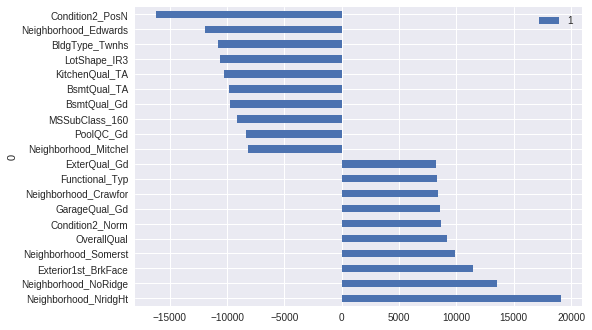

In [100]:
plot_coef(ridgecv_raw)

#### Which features add / take away most value from a home?

Top three value adders:
    * Neighborhhood_NridgHt
    * Neighborhood_NoRidge
    * Exterior1st_BrkFace
    
Top three value reducers:
    * Condition2_PosN
    * Neighborhood_Edwards
    * BdgType_Twnhs

# (Optional) Informing Business Value

Interpreting our work for a non-technical audience is a vital skill that every good Data Scientist must cultivate.  At the end of the day, our work must be informative to business process so connecting our detailed efforts to a high level strategy is critical.

We've established a few businesses cases that you should assert some explanation and advise best strategy through a model of your choice.  Also call out any exploratory analysis and reasoning for any recommendation.

##### For each question:
* Plot relevant data
* Fit a new model or use a previous  model
* Plot relevant coefficients


#### (Optional) Case 1: Which features add / take away most value from a home?

You just explained which coeffients add / take away most value, technically, but can you explain this in a non-technical manner?  Also, emphasize _why_ in your explanation.

- Choose a few examples and explain why the coefficients describe the target value of the property.

#### (Optional) Case 2: Can you identify any abnormally priced houses?
We might consider these being properties that are over or under predicted by price. Can you make sense of when and why these are over and under predicted?

#### (Optional) Case 3:  Which houses are good investments?

Which criteria would you look at?  How sure can you be of your assumptions?  Give precise metrics but also give a concise recommendation that is non-technical that communicates the risks of your anlaysis.

#### (Optional) Case 4:  Which houses are good investments (extended)?
One idea that is common in the real-estate invement community is called "flipping".  This usually entails buying a property with "changable" charactaristics that can be upgraded.  Examples of changable or "upgradable" features include:  A garage, a kitchen, etc.

Can you give us an idea of investments opportunities considering "upgradable" features?  You will have to explore this idea on your own and possibly do a little research for subject matter expertise.

- Some features of a house are worth more than others
- Some features can't be upgraded (ie: square footage)